<a href="https://colab.research.google.com/github/HernanDL/Noise-Cancellation-Using-GenAI/blob/main/Simple_CNN_(Test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load Required Libraries
#!pip install torch torchaudio librosa matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from scipy.signal import filtfilt
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
import IPython.display as ipd

# Step 2: Load Input Noise Waveform
uploaded = files.upload()

input_file = next(iter(uploaded))
input_waveform, sr = librosa.load(input_file, sr=None)

print(f"input_waveform len: {len(input_waveform)}")
sampling_rate_khz = sr / 1000  # Convert to kHz
print(f"Sampling Rate: {sampling_rate_khz:.2f} kHz")

duration = librosa.get_duration(y=input_waveform, sr=sr)
print(f"Duration: {duration:.2f} seconds")

Saving Bn-ord-B3-mf-N-N.wav to Bn-ord-B3-mf-N-N (4).wav
input_waveform len: 201450
Sampling Rate: 44.10 kHz
Duration: 4.57 seconds


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 201448, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 100724, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 100722, 64)          │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 50361, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3223104)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     412,557,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 201450)              │      25,987,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 438,550,826 (1.63 GB)

 Trainable params: 438,550,826 (1.63 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.2780
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.3099
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.2361
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.1710
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0846
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.0515
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0343
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0206
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0180
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0176
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0144
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0152
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0137
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0096
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0075
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/ste

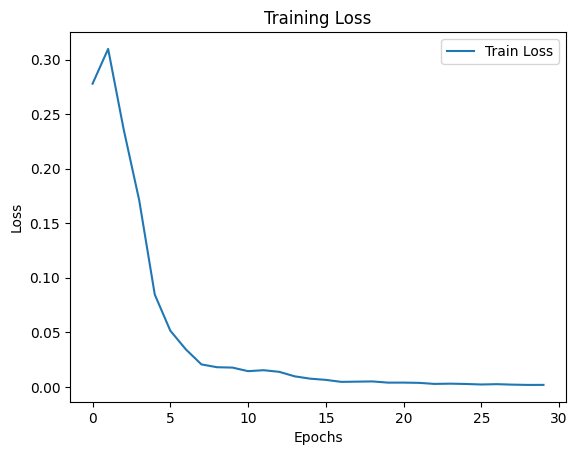

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


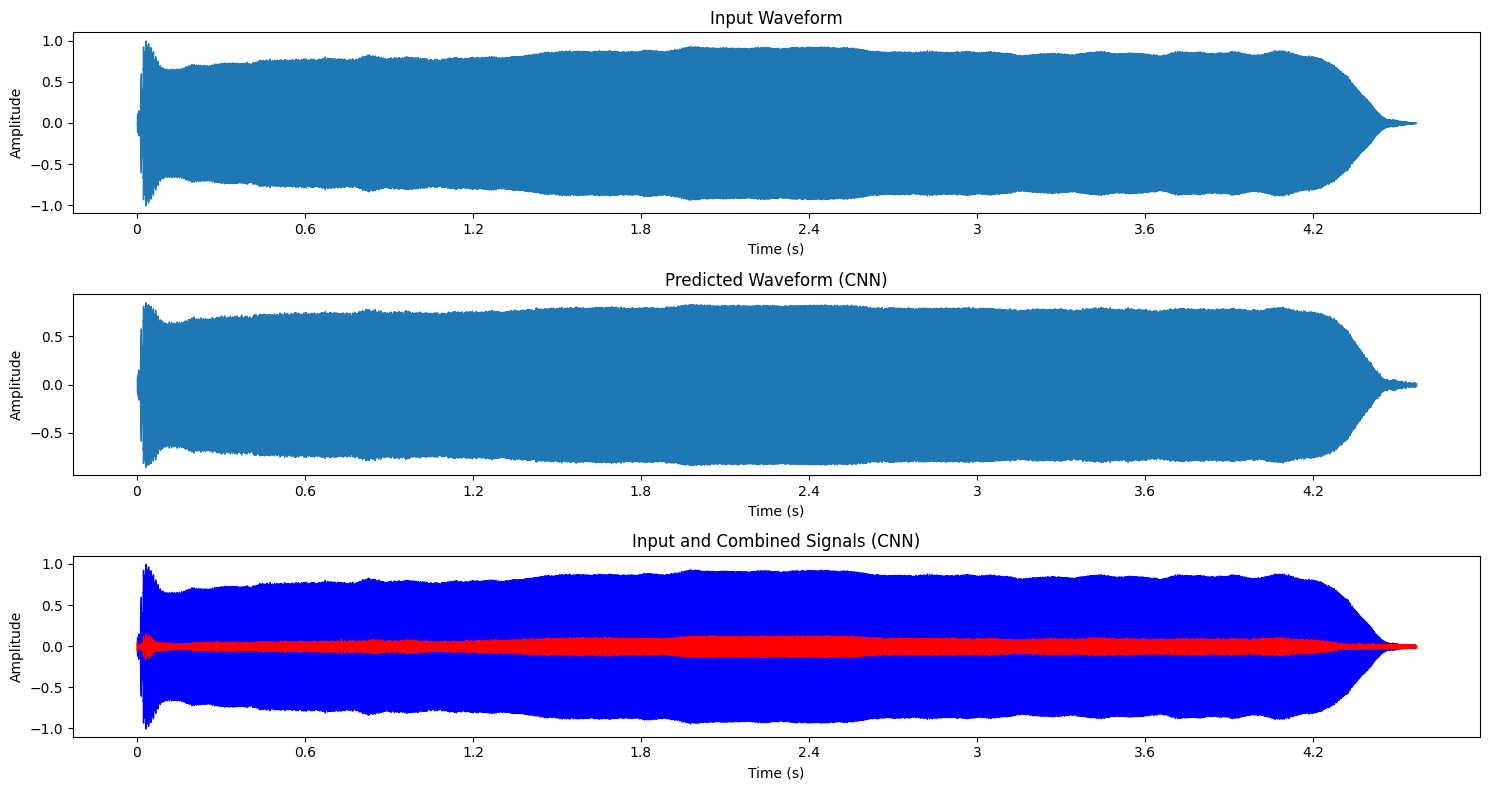

Playing Input Waveform:
Playing Predicted Waveform (CNN):


Playing Combined Signal (CNN):


In [2]:
# Step 3: Preprocess the Data
def preprocess_waveform(waveform):
    return waveform / np.max(np.abs(waveform))

input_waveform = preprocess_waveform(input_waveform)

# Reshape for CNN input (1 sample, length of waveform, 1 channel)
X_cnn = input_waveform.reshape(1, -1, 1)

# Step 4: Define the CNN Model with Input Layer
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_cnn.shape[1], X_cnn.shape[2])),  # Specify input shape here
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(input_waveform), activation='tanh')  # Output shape matches input shape
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.summary()

# Step 5: Train the CNN Model
target_waveform = -X_cnn

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1)

# Train model (using a small number of epochs for demonstration)
history = cnn_model.fit(X_cnn, target_waveform, epochs=30, batch_size=1, callbacks=[early_stopping], verbose=1)

# Visualize Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

# Predict the output waveform using CNN
predicted_waveform_cnn = cnn_model.predict(X_cnn).flatten()

# Function to apply Gaussian Filter with Linear Phase (Forward-Backward Filtering)
def gaussian_filter_linear_phase(signal, window_size, sigma):
    gauss_kernel = np.exp(-(np.linspace(-2.5, 2.5, window_size))**2 / (2 * sigma**2))
    gauss_kernel /= np.sum(gauss_kernel)
    return filtfilt(gauss_kernel, 1, signal)

# apply filter to remove residual noise
# if predictions are near perfect, this may be avoided
predicted_waveform_cnn = gaussian_filter_linear_phase(predicted_waveform_cnn, window_size=15, sigma=1.5)


# Step 6: Visualize Results for CNN
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
librosa.display.waveshow(input_waveform, sr=sr)
plt.title('Input Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
librosa.display.waveshow(predicted_waveform_cnn, sr=sr)
plt.title('Predicted Waveform (CNN)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

combined_waveform_cnn = input_waveform + predicted_waveform_cnn

plt.subplot(3, 1, 3)
librosa.display.waveshow(input_waveform, sr=sr, label='Input Waveform', color='b')
librosa.display.waveshow(combined_waveform_cnn, sr=sr, label='Combined Waveform', color='r')
plt.title('Input and Combined Signals (CNN)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Audio Playback for CNN Results
print("Playing Input Waveform:")
ipd.display(ipd.Audio(input_waveform, rate=sr))

print("Playing Predicted Waveform (CNN):")
ipd.display(ipd.Audio(predicted_waveform_cnn, rate=sr))

print("Playing Combined Signal (CNN):")
ipd.display(ipd.Audio(combined_waveform_cnn, rate=sr))
